<a href="https://colab.research.google.com/github/Julspardia/Topicos-en-Estadistica/blob/main/Topicos_en_estadistica_Tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Solución Tarea 5
## Procedimiento 1




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-3-62bd0ea319fd>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(2)

<ipython-input-4-5d68ff406d18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,nan,9,1,1
11,3,0.0,1,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,1
11,3,0.0,1,1,1


In [ ]:
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)
df.loc[(df.P_PMAN_IRIS == "6"), 'P_PMAN_IRIS'] = "6.0"
df.head(4)

<ipython-input-6-86a137331bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6.0,9,1,1
11,3,0.0,1,1,1
11,1,0.0,1,2,1
11,3,6.0,1,1,1


In [ ]:
df["PESO_NAC"] = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "< 1.5-2 Kg"
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2.5-3 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3.5-4 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = "> 4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "Kg desco"
print(df)

          SEXO P_PMAN_IRIS    PESO_NAC  T_GES  ASIS_MED
COD_DPTO                                               
70           3         6.0    Kg desco      1         1
11           3         0.0      < 1 Kg      1         1
11           1         0.0      < 1 Kg      2         1
11           3         6.0      < 1 Kg      1         1
11           2         6.0  < 1.5-2 Kg      3         1
...        ...         ...         ...    ...       ...
41           3         6.0      < 1 Kg      1         1
11           3         6.0    Kg desco      1         1
11           3         0.0    Kg desco      1         1
76           3         6.0      < 1 Kg      1         1
11           3         0.0      < 1 Kg      1         1

[33327 rows x 5 columns]


<ipython-input-7-ed72fc39c3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PESO_NAC"] = df.PESO_NAC.astype(str)


In [ ]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)
trainX

,SEXO,P_PMAN_IRIS,T_GES,ASIS_MED
COD_DPTO,,,,
5,1,6.0,1,1
76,3,6.0,1,1
5,3,6.0,9,1
76,3,0.0,1,1
68,1,6.0,3,2
...,...,...,...,...
54,2,6.0,3,1
5,2,6.0,3,1
11,3,6.0,1,1


### Creamos la matriz dummie



In [ ]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

<ipython-input-9-8a7cd2abb3a3>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)


,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Kg desco
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,< 1 Kg
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg


In [ ]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


aqui, se hizo un tratamiento de datos con el objetivo de construir la matriz dummi para poder obtener los datos de entrenamiento y validación del modelo.

##Procedimiento 2.

In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12,12,12,12),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12),
              max_iter=500)

 ## Procedimiento 3.
 ### Matriz de confusión y curva de perdida

In [ ]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred1)))

Exactitud: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred1)

Text(0.5, 1.0, 'Confusion Matriz')

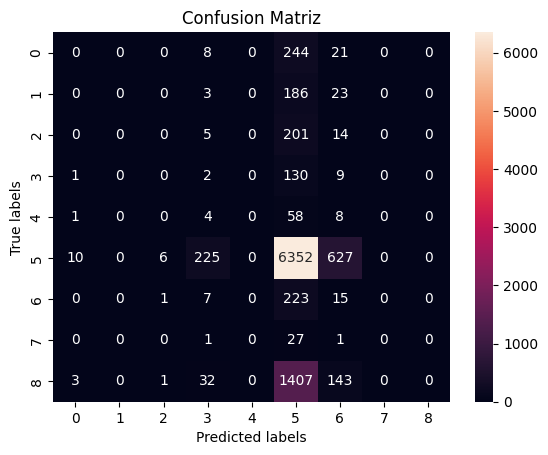

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matriz')

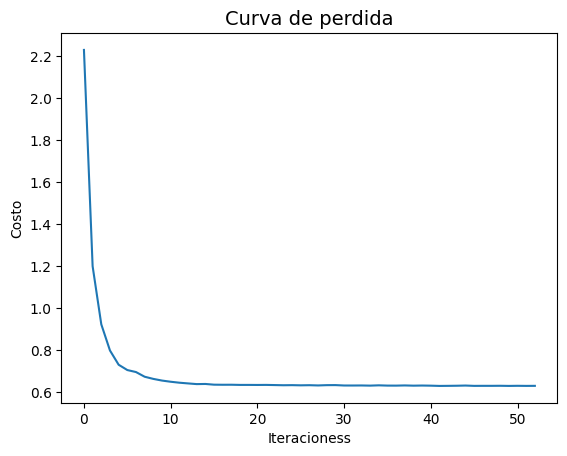

In [ ]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

Revisando la matriz de confusión, la exactitud de nuestra predicción y la curva de perdida podemos notar que nuestro modelo no es adecuado para los datos, pues en la matriz de confusión se puede observar que la mayoria de informacion en la diagonal son ceros y nuestro ajuste es tan solo de 75% y el modelo se ajusta de buena forma en el intervalo de peso 2.5 - 3 kg

## Procedimiento 4.

Supongamos que un bebé tiene bajo peso si al momento de su muerte tiene un peso <2.5 kg

In [ ]:
train1.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_obs = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])
mlp_clf1.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
no_obs1 = np.array([[0, 1, 0, 0, 1, 0, 0, 0, 0,0, 1, 0, 0, 0, 0]])
mlp_clf1.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
no_obs2 = np.array([[0, 0, 1, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1]])
mlp_clf1.predict(no_obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
no_obs3 = np.array([[0, 0, 1, 0, 0, 1, 0, 0, 0,0, 0, 0, 0, 0, 1]])
mlp_clf1.predict(no_obs3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
no_obs4 = np.array([[1, 0, 0, 0, 0, 0, 0, 1, 0,0, 0, 1, 0, 0, 0]])
mlp_clf1.predict(no_obs4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1.5-2 Kg'], dtype='<U10')

In [ ]:
df.PESO_NAC.unique()

array(['Kg desco', '< 1 Kg', '< 1.5-2 Kg', '3.5-4 Kg', '1-1.5 Kg',
       '2.5-3 Kg', '2-2.5 Kg', '3-3.5 Kg', '> 4 Kg'], dtype=object)

## Procedimiento 5.

Duplicaremos nuestras capas ocultas con la misma cantidad de nodos, verificando si nuestro modelo tiene alguna mejora.

In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf2.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                                  12, 12, 12, 12, 12, 12, 12),
              max_iter=500)

In [ ]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(test1))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred2)))

Exactitud: 0.75


El modelo no presenta ninguna mejora para las predicciones, se seguir cambiando nuestras capas ocultas y la cantidad de nodos con el fin de buscar una mejor aproximación o realizar ajustes a las variables que usamos para nuestro modelo ya sea agregando o quitando variables.